In [2]:
import pandas as pd
import numpy as np
import requests
import re
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sb

from bs4 import BeautifulSoup

%matplotlib inline

In [3]:
kaggle_data = pd.read_csv('multiple_choice_responses.csv')
kaggle_data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [4]:
# Helper function to turn skills into columns and encode them
def get_skills_df(df):
    for col in df.columns.values:
        skill = df[pd.notnull(df[col])][col].unique()[0] # get the selected choice for the corresponding col
        df.loc[:, col] = df.loc[:, col].map({skill: 1})
        df.rename(columns={col:skill.lower()}, inplace=True)
    df.fillna(0, inplace=True)
    
    return df

In [5]:
# programming languages, Q18 in the dataset (10 options)
languages = kaggle_data[['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 
                       'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10']]
languages.drop([0], inplace=True)
languages = get_skills_df(languages)


# Get Visualization tools used: Q20
viz_tools = kaggle_data[['Q20_Part_1', 'Q20_Part_2', 'Q20_Part_3', 'Q20_Part_4', 'Q20_Part_5', 'Q20_Part_6', 'Q20_Part_7', 
                       'Q20_Part_8', 'Q20_Part_9', 'Q20_Part_10']]
viz_tools.drop([0], inplace=True)
viz_tools = get_skills_df(viz_tools)


# Get ML algorithms used on a regular basis: Q24
ml_algo = kaggle_data[['Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4', 'Q24_Part_5', 'Q24_Part_6', 'Q24_Part_7', 
                       'Q24_Part_8', 'Q24_Part_9', 'Q24_Part_10']]
ml_algo.drop([0], inplace=True)
ml_algo = get_skills_df(ml_algo)


# Get ML algorithms used on a regular basis: Q24
ml_algo = kaggle_data[['Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4', 'Q24_Part_5', 'Q24_Part_6', 'Q24_Part_7', 
                       'Q24_Part_8', 'Q24_Part_9', 'Q24_Part_10']]
ml_algo.drop([0], inplace=True)
ml_algo = get_skills_df(ml_algo)


# Get Computer Vision methods used on a regular basis
computer_vision = kaggle_data[['Q26_Part_1', 'Q26_Part_2', 'Q26_Part_3', 'Q26_Part_4', 'Q26_Part_5']]
computer_vision.drop([0], inplace=True)
computer_vision = get_skills_df(computer_vision)


# Get NLP methods used on a regular basis
nlp = kaggle_data[['Q27_Part_1', 'Q27_Part_2', 'Q27_Part_3', 'Q27_Part_4']]
nlp.drop([0], inplace=True)
nlp = get_skills_df(nlp)


# Get ML frameworks used: Q28
ml_frameworks = kaggle_data[['Q28_Part_1', 'Q28_Part_2', 'Q28_Part_3', 'Q28_Part_4', 'Q28_Part_5', 'Q28_Part_6', 'Q28_Part_7', 'Q28_Part_8', 'Q28_Part_9', 'Q28_Part_10']]
ml_frameworks.drop([0], inplace=True)
ml_frameworks = get_skills_df(ml_frameworks)


# Get cloud computing platforms used: Q29
cloud_computing = kaggle_data[['Q29_Part_1', 'Q29_Part_2', 'Q29_Part_3', 'Q29_Part_4', 'Q29_Part_5', 'Q29_Part_6',
                               'Q29_Part_7','Q29_Part_8', 'Q29_Part_9', 'Q29_Part_10']]
cloud_computing.drop([0], inplace=True)
cloud_computing = get_skills_df(cloud_computing)


# Get big data/ analytics products used: Q31
big_data = kaggle_data[['Q31_Part_1', 'Q31_Part_2', 'Q31_Part_3', 'Q31_Part_4', 'Q31_Part_5', 'Q31_Part_6',
                               'Q31_Part_7','Q31_Part_8', 'Q31_Part_9', 'Q31_Part_10']]
big_data.drop([0], inplace=True)
big_data = get_skills_df(big_data)


# Get ML products used: Q32
ml_products = kaggle_data[['Q32_Part_1', 'Q32_Part_2', 'Q32_Part_3', 'Q32_Part_4', 'Q32_Part_5', 'Q32_Part_6',
                               'Q32_Part_7','Q32_Part_8', 'Q32_Part_9', 'Q32_Part_10']]
ml_products.drop([0], inplace=True)
ml_products = get_skills_df(ml_products)


# Get database products used: Q34
db_products = kaggle_data[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6',
                               'Q34_Part_7','Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10']]
db_products.drop([0], inplace=True)
db_products = get_skills_df(db_products)


# Get database products used: Q34
db_products = kaggle_data[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6',
                               'Q34_Part_7','Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10']]
db_products.drop([0], inplace=True)
db_products = get_skills_df(db_products)


# Get database products used: Q34
db_products = kaggle_data[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6',
                               'Q34_Part_7','Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10']]
db_products.drop([0], inplace=True)
db_products = get_skills_df(db_products)

In [6]:
# Combine all the skills dataframe into one
kaggle_skills = pd.concat([languages, viz_tools, ml_algo, computer_vision, nlp, ml_frameworks, cloud_computing, 
                          big_data, ml_products, db_products], axis=1)
kaggle_skills.head(10)

,python,r,sql,c,c++,java,javascript,typescript,bash,matlab,...,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


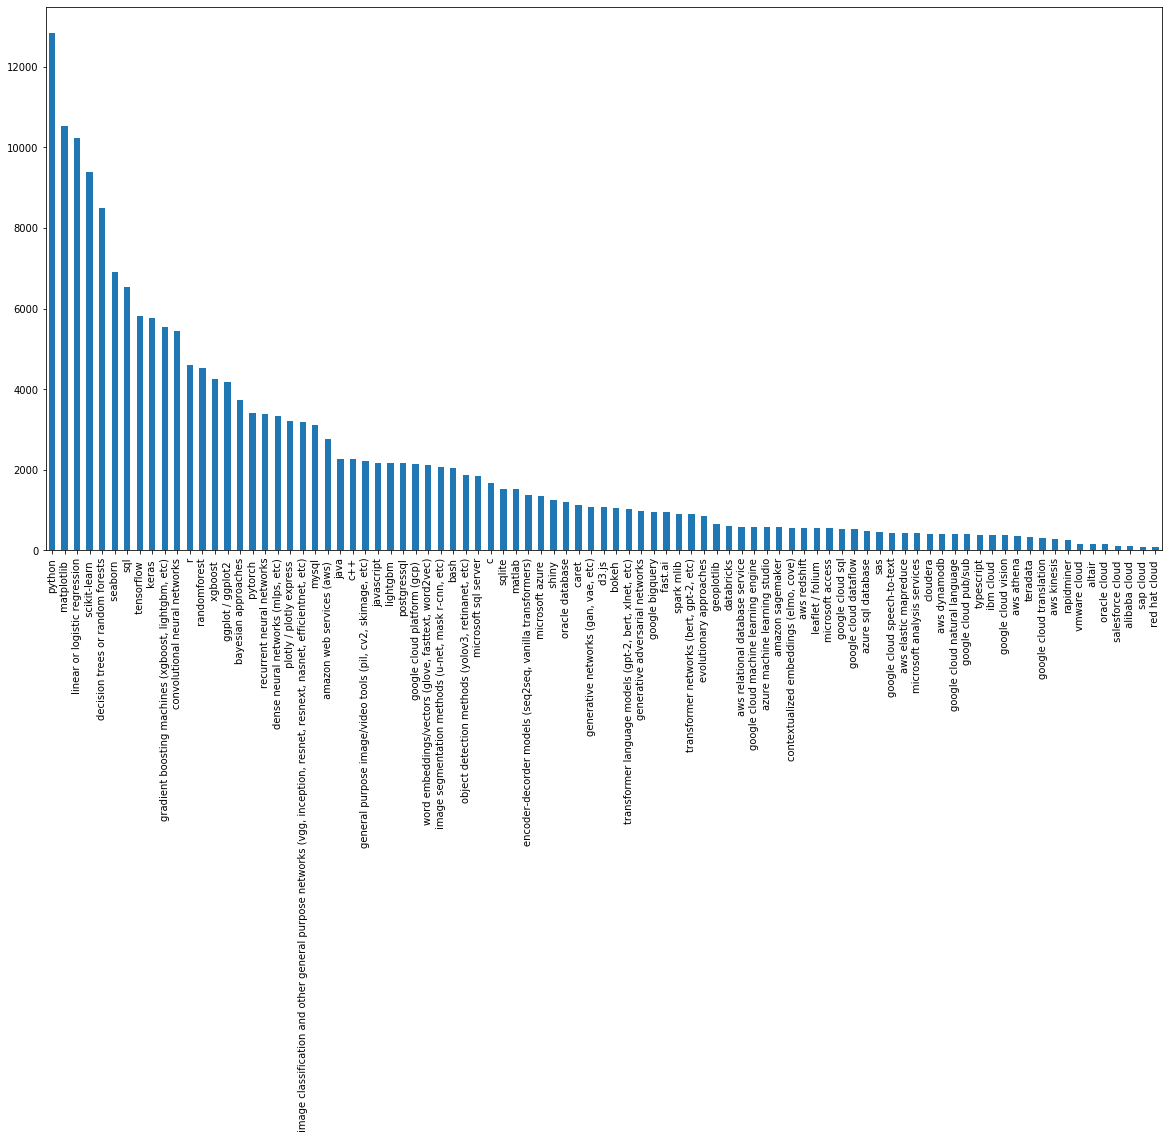

In [7]:
plt.figure(figsize=(20,10))
ax = kaggle_skills.sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

In [14]:
# Indeed displays ~10-15 jobs on each page, while each job itself can be identify as a page.
# So we search jobs every 10 pages.
# For 1000+ jobs, we need to go through 100+ pages with 10+ jobs on each page. 
pages = list(range(0,1100,10))

def get_indeed_jobs():
    job_info = []
    for page in pages:
        result = requests.get("https://ca.indeed.com/jobs?q=data+analyst%2C+data+scientist&start="+str(page)).text
        soup = BeautifulSoup(result, 'lxml')
        print(soup)
        return
        if soup.find_all(class_ = "result") is None:
            return []
        for jobs in soup.find_all(class_ = "result"): 
            try:
                position_title = jobs.find('a', class_='jobtitle turnstileLink').text.strip()
            except:
                position_title = None

            try:
                employer = jobs.find('span', class_='company').text.strip()
            except:
                employer = None

            try:
                location = jobs.find('span', class_='location').text.strip()
            except:
                location = None

            try:
                salary = jobs.find('span', class_ = 'salaryText').text.strip()
            except:
                salary = None

            try:
                link = base + jobs.find('a').attrs['href']
            except:
                link = None

            job_info.append({
                'position_title': position_title, 
                'employer': employer,
                'location': location,
                'salary': salary,
                'link': link})

    return job_info
 
job_info = get_indeed_jobs()

In [15]:
print(len(job_info))
job_info_df = pd.DataFrame(job_info)
job_info_df.drop_duplicates(['link'], keep='first')
job_info_df["position_title"] = job_info_df["position_title"].replace('', np.nan)
job_info_df = job_info_df.dropna(subset=['position_title'])
print(job_info_df.shape)
print(job_info_df.head())

516
(516, 5)
                                   position_title  \
0                                    Data Analyst   
1                                  Data Scientist   
2  Senior Business Intelligence Analyst (B052-20)   
3   Junior Data Analyst in Montreal (Entry Level)   
4                                  Data Scientist   

                               employer location                    salary  \
0  Special Risk Insurance Managers Ltd.     None                      None   
1     Just Order Enterprises Corp. (饭团)     None                      None   
2                          Legal Aid BC     None  $72,602 - $83,101 a year   
3                       BDP CALL CENTER     None               $15 an hour   
4                                  FORM     None                      None   

   link  
0  None  
1  None  
2  None  
3  None  
4  None  


In [16]:
skills = kaggle_skills.columns.values
for skill in skills:
    job_info_df[skill] = np.zeros(len(job_info))
job_info_df.head()

,position_title,employer,location,salary,link,python,r,sql,c,c++,...,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
0,Data Analyst,Special Risk Insurance Managers Ltd.,None,None,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Data Scientist,Just Order Enterprises Corp. (饭团),None,None,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Senior Business Intelligence Analyst (B052-20),Legal Aid BC,None,"$72,602 - $83,101 a year",None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Junior Data Analyst in Montreal (Entry Level),BDP CALL CENTER,None,$15 an hour,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Data Scientist,FORM,None,None,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
def get_job_details(job_info):
    for i in range(len(job_info)):
        link = requests.get(job_info.loc[i, 'link'])
        soup = BeautifulSoup(link.text, "lxml")
        try:
            text = soup.find('div', class_ = 'jobsearch-jobDescriptionText').text.strip().lower()
            # Text pre-processing
            text = re.sub(r'\,', ' ', text) 
            text = re.sub('/', ' ', text) 
            text = re.sub(r'\(', ' ', text) 
            text = re.sub(r'\)', ' ', text) 
            text = re.sub(' +',' ',text) 
        except:
            text = ""

        for s in skills :
            # This is specifically for C++, escape the ++. Convert C++ to C\+\+
            if any(x in s for x in ['+']):
                skill = re.escape(s)
            else:
                skill = s

            matching = re.search(r'(?:^|(?<=\s))' + skill + r'(?=\s|$)',text)
            if matching:
                job_info[s][i] = 1
    return job_info

In [18]:
job_info_details = get_job_details(job_info_df)
job_info_details.head(10)

MissingSchema: Invalid URL 'None': No schema supplied. Perhaps you meant http://None?

In [153]:
indeed_skills = job_info_details.drop(['employer', 'link', 'location', 'position_title', 'salary'], axis=1)
indeed_skills.to_csv('./indeed_skills.csv', index=True)
indeed_skills.head()

,python,r,sql,c,c++,java,javascript,typescript,bash,matlab,...,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


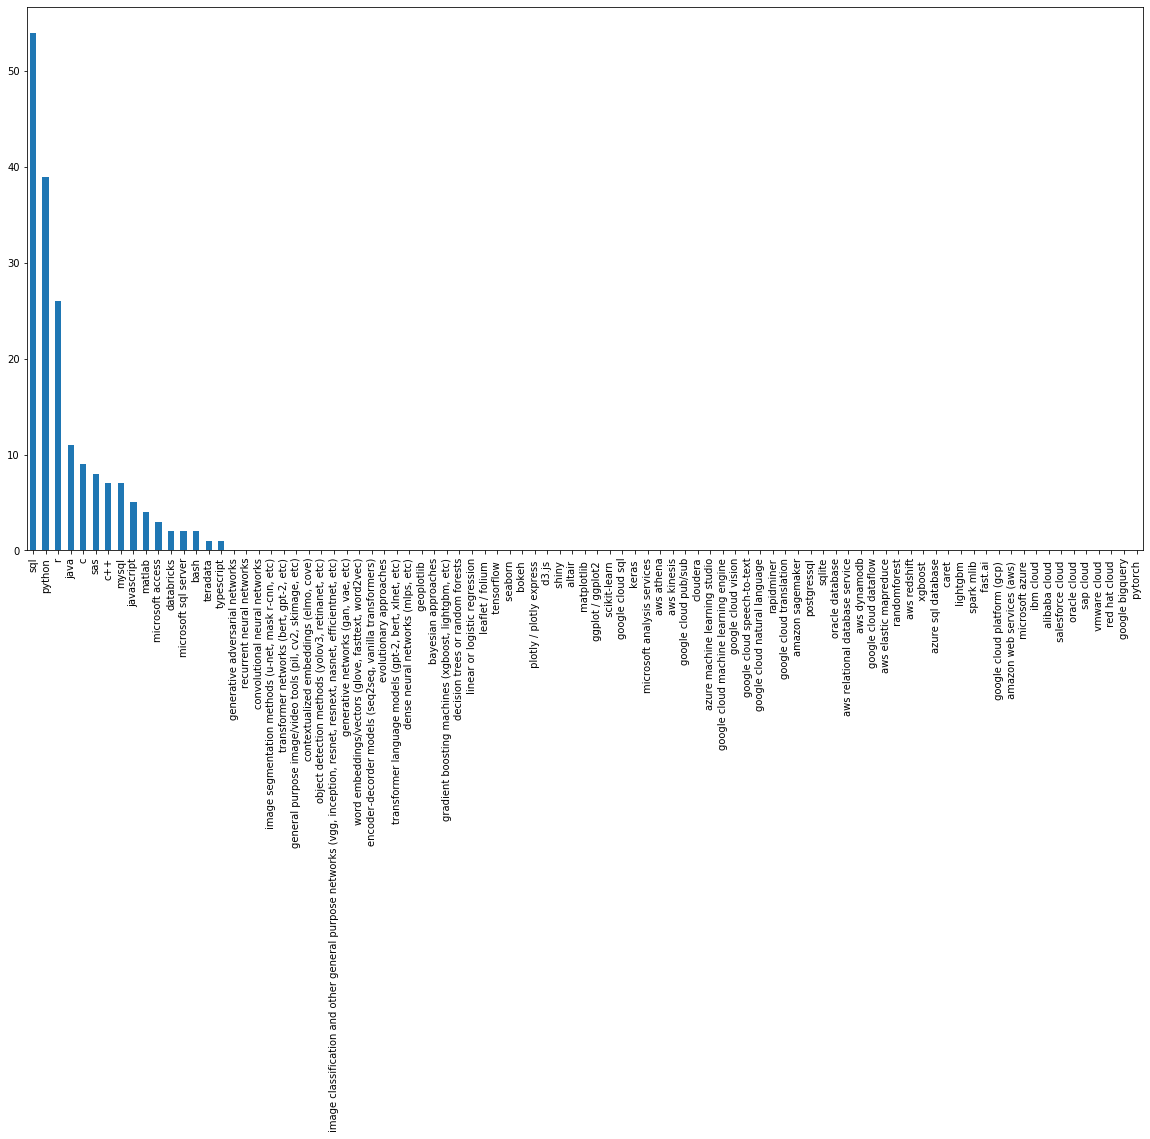

In [154]:
plt.figure(figsize=(20,10))
indeed_skills.sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

In [155]:
kaggle_data_2018 = pd.read_csv('multiple_choice_responses_2018.csv')
kaggle_data_2018.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [156]:
for i in range(kaggle_data_2018.shape[1]):
    if "_Part_1" in kaggle_data_2018.columns[i] and len(kaggle_data_2018.columns[i]) < len("Q16_Part_14"):
        print("\nColumn Index =", i)
        print("Column Name =", kaggle_data_2018.columns[i])
        print(kaggle_data_2018.iloc[0, i])


Column Index = 14
Column Name = Q11_Part_1
Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions

Column Index = 29
Column Name = Q13_Part_1
Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Jupyter/IPython

Column Index = 45
Column Name = Q14_Part_1
Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Kaggle Kernels

Column Index = 57
Column Name = Q15_Part_1
Which of the following cloud computing services have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Google Cloud Platform (GCP)

Column Index = 65
Column Name = Q16_Part_1
What programming languages do you use on a regular basis? (Select all that apply) - S

From the above we can extract some questions that are particularly relevant to our analysis:

Column Index = 29  
Column Name = Q13_Part_1  
Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Jupyter/IPython

Column Index = 45  
Column Name = Q14_Part_1  
Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Kaggle Kernels

Column Index = 57  
Column Name = Q15_Part_1  
Which of the following cloud computing services have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Google Cloud Platform (GCP)

Column Index = 65  
Column Name = Q16_Part_1  
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python

Column Index = 88  
Column Name = Q19_Part_1  
What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice - Scikit-Learn

Column Index = 110  
Column Name = Q21_Part_1  
What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Selected Choice - ggplot2
 
Column Index = 130  
Column Name = Q27_Part_1  
Which of the following cloud computing products have you used at work or school in the last 5 years (Select all that apply)? - Selected Choice - AWS Elastic Compute Cloud (EC2)
 
Column Index = 151  
Column Name = Q28_Part_1  
Which of the following machine learning products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Amazon Transcribe

Column Index = 195  
Column Name = Q29_Part_1  
Which of the following relational database products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - AWS Relational Database Service

Column Index = 224  
Column Name = Q30_Part_1  
Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - AWS Elastic MapReduce



In [184]:
questions = ["Q13", "Q14", "Q15", "Q16", "Q19", "Q21", "Q27", "Q28", "Q29", "Q30"]
question_columns = []
column_names_dict = dict()
for question in questions:
    for i in range(kaggle_data_2018.shape[1]):
        column = kaggle_data_2018.columns[i]
        if question in column and "OTHER" not in column:
            question_columns.append(column)
            start_index = kaggle_data_2018.iloc[0, i].index("-", \
                kaggle_data_2018.iloc[0, i].index("-")+1)
            column_names_dict[column] = kaggle_data_2018.iloc[0, i][start_index+1:]
# question_columns = ['Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', ...]

In [188]:
kd_2018_qs = kaggle_data_2018[question_columns]

def one_hot(element):
    if element is np.nan:
        return 0
    return 1

for column in kd_2018_qs.columns:
    kd_2018_qs[column] = kd_2018_qs[column].map(one_hot)

kd_2018_qs = kd_2018_qs.rename(columns=column_names_dict)

In [189]:
kd_2018_qs = kd_2018_qs[1:]
kd_2018_qs.head()

,Jupyter/IPython,RStudio,PyCharm,Visual Studio Code,nteract,Atom,MATLAB,Visual Studio,Notepad++,Sublime Text,...,Snowflake,Databricks,Azure SQL Data Warehouse,Azure HDInsight,Azure Stream Analytics,IBM InfoSphere DataStorage,IBM Cloud Analytics Engine,IBM Cloud Streaming Analytics,None,Other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


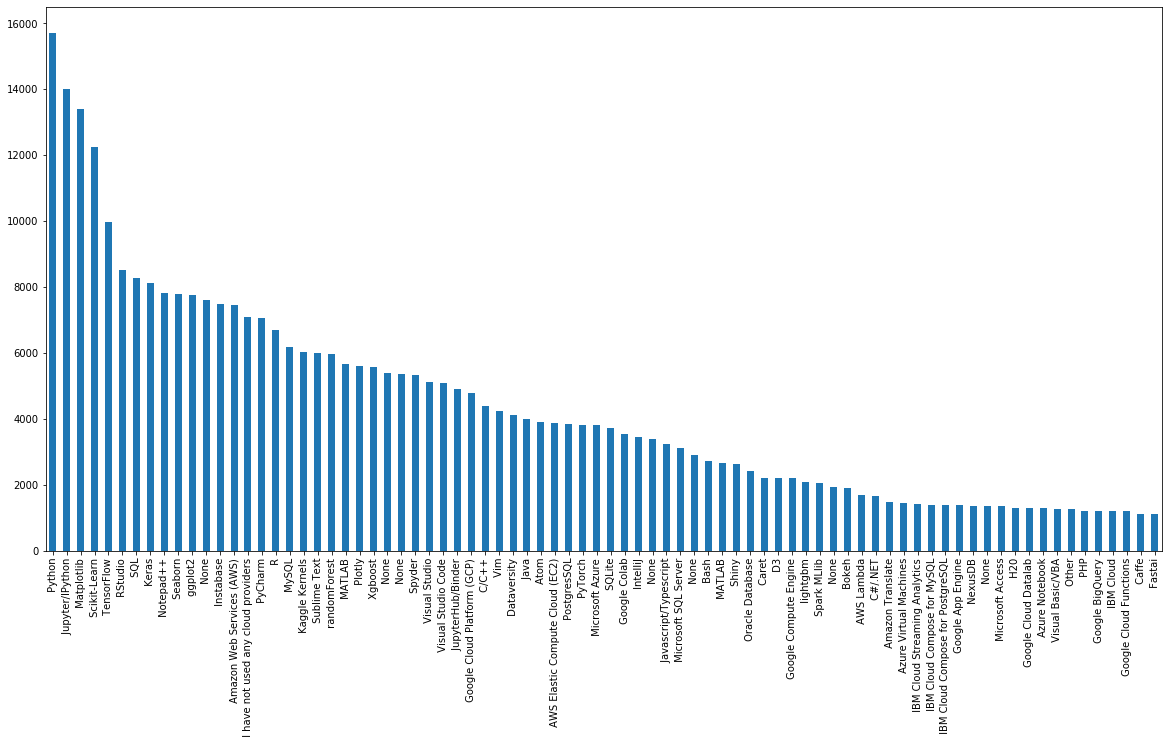

In [202]:
plt.figure(figsize=(20,10))
sorted_counts_2018 = kd_2018_qs.sum().sort_values(ascending=False)
sorted_counts_2018[:80].plot(kind="bar")

In [1]:
sorted_counts_2018.to_csv('./kaggle_skills_2018.csv', index=True)

NameError: name 'sorted_counts_2018' is not defined